### **INTRODUCTION**


- Clearly explain the aim of the project  
- Explain the summary of the dataset (which dataset is chosen, how many rows, how many attributes)
- Which tools will be used and which ML methods will be used

### **I. DATA PREPARATION**


- Install Python packages. Import **specialized packages**

In [ ]:
import sys

!pip install ydata-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=02d78e9c6d26a4b722c7ced9ab3e303c346f779c64a02ff0b83e5a39924b5592
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.

- Upload dataset to Google Drive, We are going to use file German_Credit..arff, because of the arff file have already been defined the correct data types.

In [ ]:
from google.colab import files
uploaded = files.upload()

- Import the Pandas, Numpy and Arff to load the Dataset

In [ ]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data_file="german_credit.arff"
data=arff.loadarff(data_file)

FileNotFoundError: [Errno 2] No such file or directory: 'german_credit.arff'

- Data Inspection

In [ ]:
# Data types:
df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    df[col] = df[col].str.decode('utf-8')
#Look at loaded data and data types
print(df.dtypes)

Creditability                         object
Account Balance                       object
Duration of Credit (month)           float64
Payment Status of Previous Credit     object
Purpose                               object
Credit Amount                        float64
Value Savings/Stocks                  object
Length of current employment          object
Instalment per cent                  float64
Sex & Marital Status                  object
Guarantors                            object
Duration in Current address           object
Most valuable available asset         object
Age (years)                          float64
Concurrent Credits                    object
Type of apartment                     object
No of Credits at this Bank           float64
Occupation                            object
No of dependents                     float64
Telephone                             object
Foreign Worker                        object
dtype: object


In [ ]:
# Let's display first 5 records
df.head(5)


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18.0,4,2,1049.0,1,2,4.0,2,...,4,2,21.0,3,1,1.0,3,1.0,1,1
1,1,1,9.0,4,0,2799.0,1,3,2.0,3,...,2,1,36.0,3,1,2.0,3,2.0,1,1
2,1,2,12.0,2,9,841.0,2,4,2.0,2,...,4,1,23.0,3,1,1.0,2,1.0,1,1
3,1,1,12.0,4,0,2122.0,1,3,3.0,3,...,2,1,39.0,3,1,2.0,2,2.0,1,2
4,1,1,12.0,4,0,2171.0,1,3,4.0,3,...,4,2,38.0,1,2,2.0,2,1.0,1,2


In [ ]:
# View dimensions (rows,columns)
df.shape

(1000, 21)

In [ ]:
# Look at meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      1000 non-null   object 
 1   Account Balance                    1000 non-null   object 
 2   Duration of Credit (month)         1000 non-null   float64
 3   Payment Status of Previous Credit  1000 non-null   object 
 4   Purpose                            1000 non-null   object 
 5   Credit Amount                      1000 non-null   float64
 6   Value Savings/Stocks               1000 non-null   object 
 7   Length of current employment       1000 non-null   object 
 8   Instalment per cent                1000 non-null   float64
 9   Sex & Marital Status               1000 non-null   object 
 10  Guarantors                         1000 non-null   object 
 11  Duration in Current address        1000 non-null   object

- Create a table with the attributes and the type

In [ ]:
# Create a dictionary to store attribute types
attribute_types = {}

# Iterate through each column in the DataFrame
for col in df.columns:
    # Determine the type of the attribute
    if df[col].dtype == 'object':
        attribute_types[col] = 'Nominal'
    elif df[col].dtype == 'float64' or df[col].dtype == 'int64':
        attribute_types[col] = 'Quantitative'
    else:
        attribute_types[col] = 'Ordinal'

# Convert the dictionary to a DataFrame for better visualization
attribute_types_df = pd.DataFrame(list(attribute_types.items()), columns=['Attribute', 'Type'])

# Print the attribute types DataFrame
print(attribute_types_df)


                            Attribute          Type
0                       Creditability       Nominal
1                     Account Balance       Nominal
2          Duration of Credit (month)  Quantitative
3   Payment Status of Previous Credit       Nominal
4                             Purpose       Nominal
5                       Credit Amount  Quantitative
6                Value Savings/Stocks       Nominal
7        Length of current employment       Nominal
8                 Instalment per cent  Quantitative
9                Sex & Marital Status       Nominal
10                         Guarantors       Nominal
11        Duration in Current address       Nominal
12      Most valuable available asset       Nominal
13                        Age (years)  Quantitative
14                 Concurrent Credits       Nominal
15                  Type of apartment       Nominal
16         No of Credits at this Bank  Quantitative
17                         Occupation       Nominal
18          

- Descriptive statistics

In [ ]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df.describe()

,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,No of dependents
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,20.903000,3271.24800,2.973000,35.54200,1.407000,1.155000
std,12.058814,2822.75176,1.118715,11.35267,0.577654,0.362086
min,4.000000,250.00000,1.000000,19.00000,1.000000,1.000000
25%,12.000000,1365.50000,2.000000,27.00000,1.000000,1.000000
50%,18.000000,2319.50000,3.000000,33.00000,1.000000,1.000000
75%,24.000000,3972.25000,4.000000,42.00000,2.000000,1.000000
max,72.000000,18424.00000,4.000000,75.00000,4.000000,2.000000


In [ ]:
distinct_values = df.nunique()
print(distinct_values)

Creditability                          2
Account Balance                        4
Duration of Credit (month)            33
Payment Status of Previous Credit      5
Purpose                               10
Credit Amount                        923
Value Savings/Stocks                   5
Length of current employment           5
Instalment per cent                    4
Sex & Marital Status                   4
Guarantors                             3
Duration in Current address            4
Most valuable available asset          4
Age (years)                           53
Concurrent Credits                     3
Type of apartment                      3
No of Credits at this Bank             4
Occupation                             4
No of dependents                       2
Telephone                              2
Foreign Worker                         2
dtype: int64


Creditability
1    700
0    300
Name: count, dtype: int64


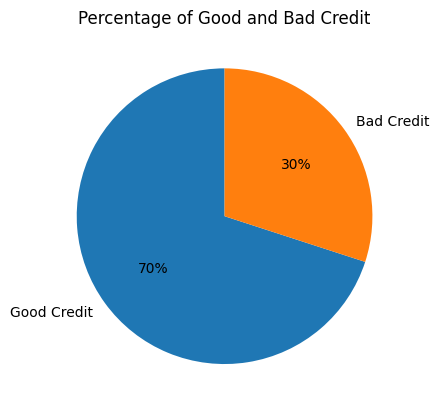

In [ ]:
# Count the occurrences of each unique value in the 'Creditability' column
creditability_counts = df['Creditability'].value_counts()

# Print the counts
print(creditability_counts)

good_bad_per=round(((df.Creditability.value_counts()/df.Creditability.count())*100))
good_bad_per
plt.pie(good_bad_per,labels=['Good Credit', 'Bad Credit'], autopct='%1.0f%%', startangle=90)
plt.title('Percentage of Good and Bad Credit');

- Exploration of continuous variables

In [ ]:
# Named the columns
df.columns=['credit','account_bal','duration','payment_status','purpose',
                   'credit_amount','savings_bond_value','employed_since',
                   'installment_rate','sex_marital','guarantor','residence_since',
                   'most_valuable_asset','age','concurrent_credits','type_of_housing',
                   'number_of_existcr','job','number_of_dependents','telephon',
                   'foreign']

In [ ]:
df['credit_amount']=np.log(df['credit_amount'])


In [ ]:
df[['duration','credit_amount','installment_rate','age','number_of_existcr','number_of_dependents']].describe()

,duration,credit_amount,installment_rate,age,number_of_existcr,number_of_dependents
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,20.903000,7.788671,2.973000,35.54200,1.407000,1.155000
std,12.058814,0.776510,1.118715,11.35267,0.577654,0.362086
min,4.000000,5.521461,1.000000,19.00000,1.000000,1.000000
25%,12.000000,7.219276,2.000000,27.00000,1.000000,1.000000
50%,18.000000,7.749107,3.000000,33.00000,1.000000,1.000000
75%,24.000000,8.287088,4.000000,42.00000,2.000000,1.000000
max,72.000000,9.821409,4.000000,75.00000,4.000000,2.000000


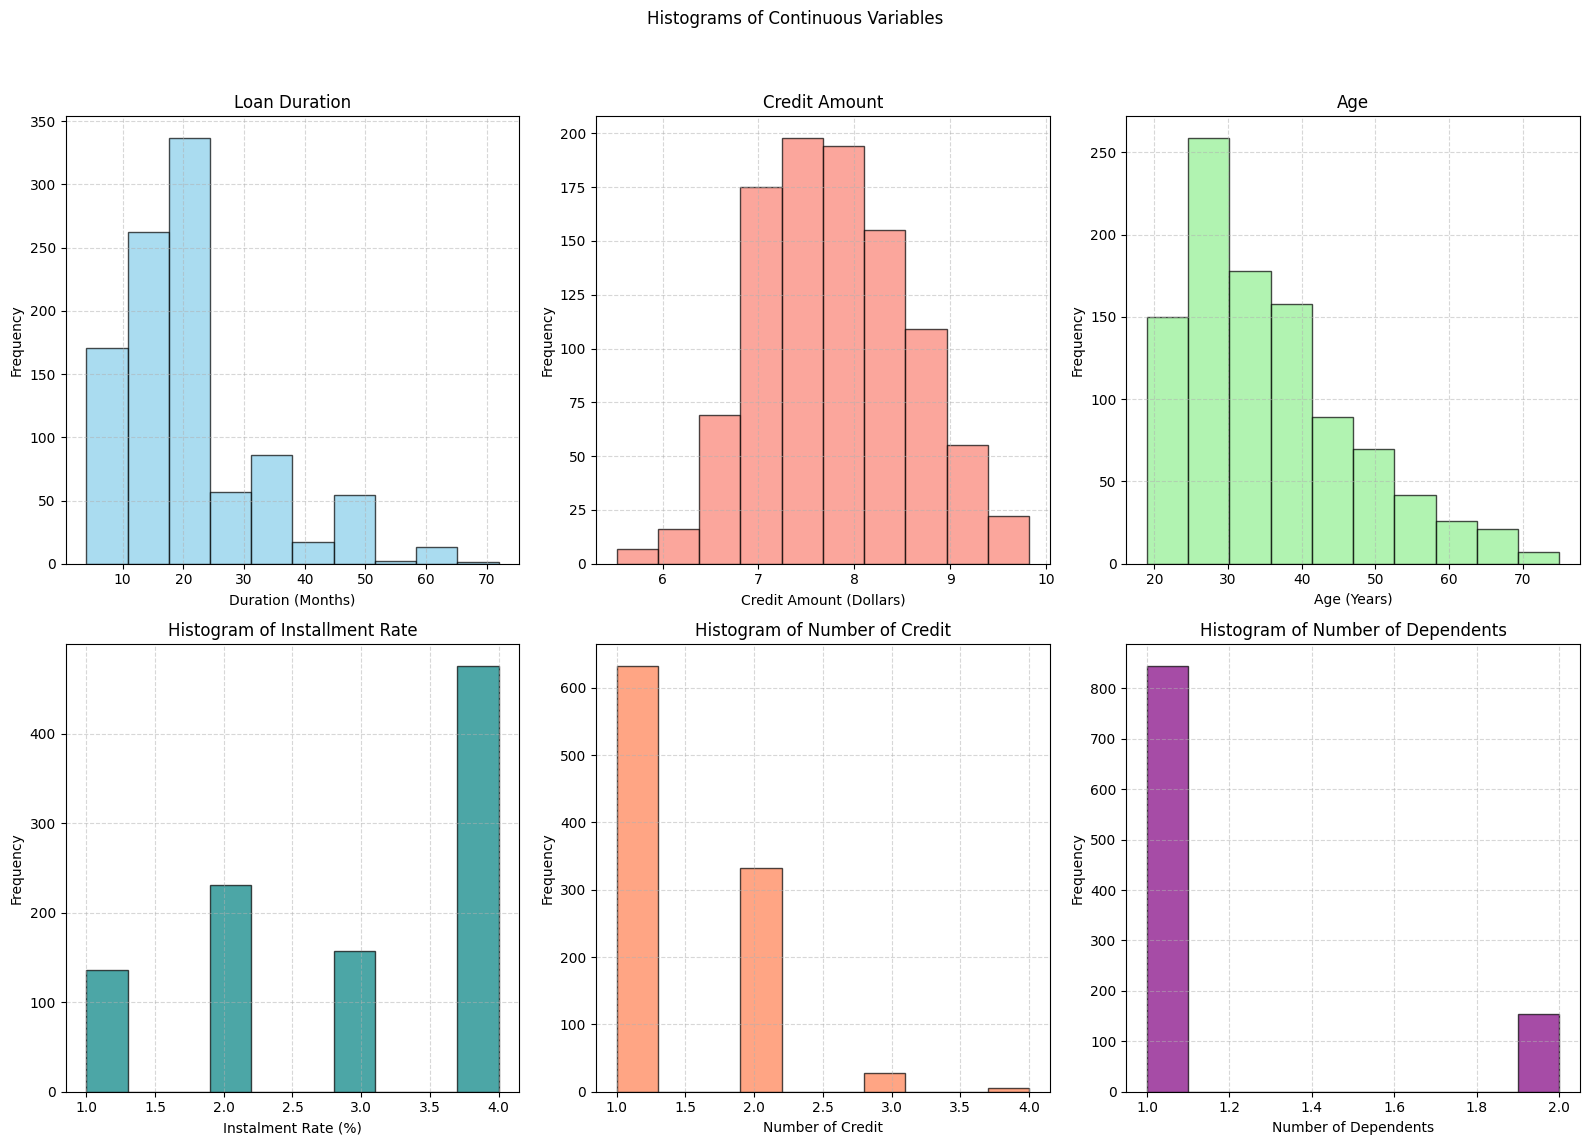

In [ ]:
# histograms of continues variables

fig, axes = plt.subplots(2, 3, figsize=(16, 12))
plt.suptitle('Histograms of Continuous Variables')

# Plot histograms for 'duration', 'credit_amount', and 'age' in the first row
axes[0, 0].hist(df['duration'], color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Duration (Months)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Loan Duration')
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

axes[0, 1].hist(df['credit_amount'], color='salmon', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Credit Amount (Dollars)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Credit Amount')
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

axes[0, 2].hist(df['age'], color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 2].set_xlabel('Age (Years)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Age')
axes[0, 2].grid(True, linestyle='--', alpha=0.5)

# Plot histograms for 'installment_rate', 'number_of_existcr', and 'number_of_dependents' in the second row
axes[1, 0].hist(df['installment_rate'], color='teal', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Instalment Rate (%)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Installment Rate')
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

axes[1, 1].hist(df['number_of_existcr'], color='coral', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Number of Credit')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Number of Credit')
axes[1, 1].grid(True, linestyle='--', alpha=0.5)

axes[1, 2].hist(df['number_of_dependents'], color='purple', edgecolor='black', alpha=0.7)
axes[1, 2].set_xlabel('Number of Dependents')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Histogram of Number of Dependents')
axes[1, 2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplot layout to prevent overlap
plt.show()


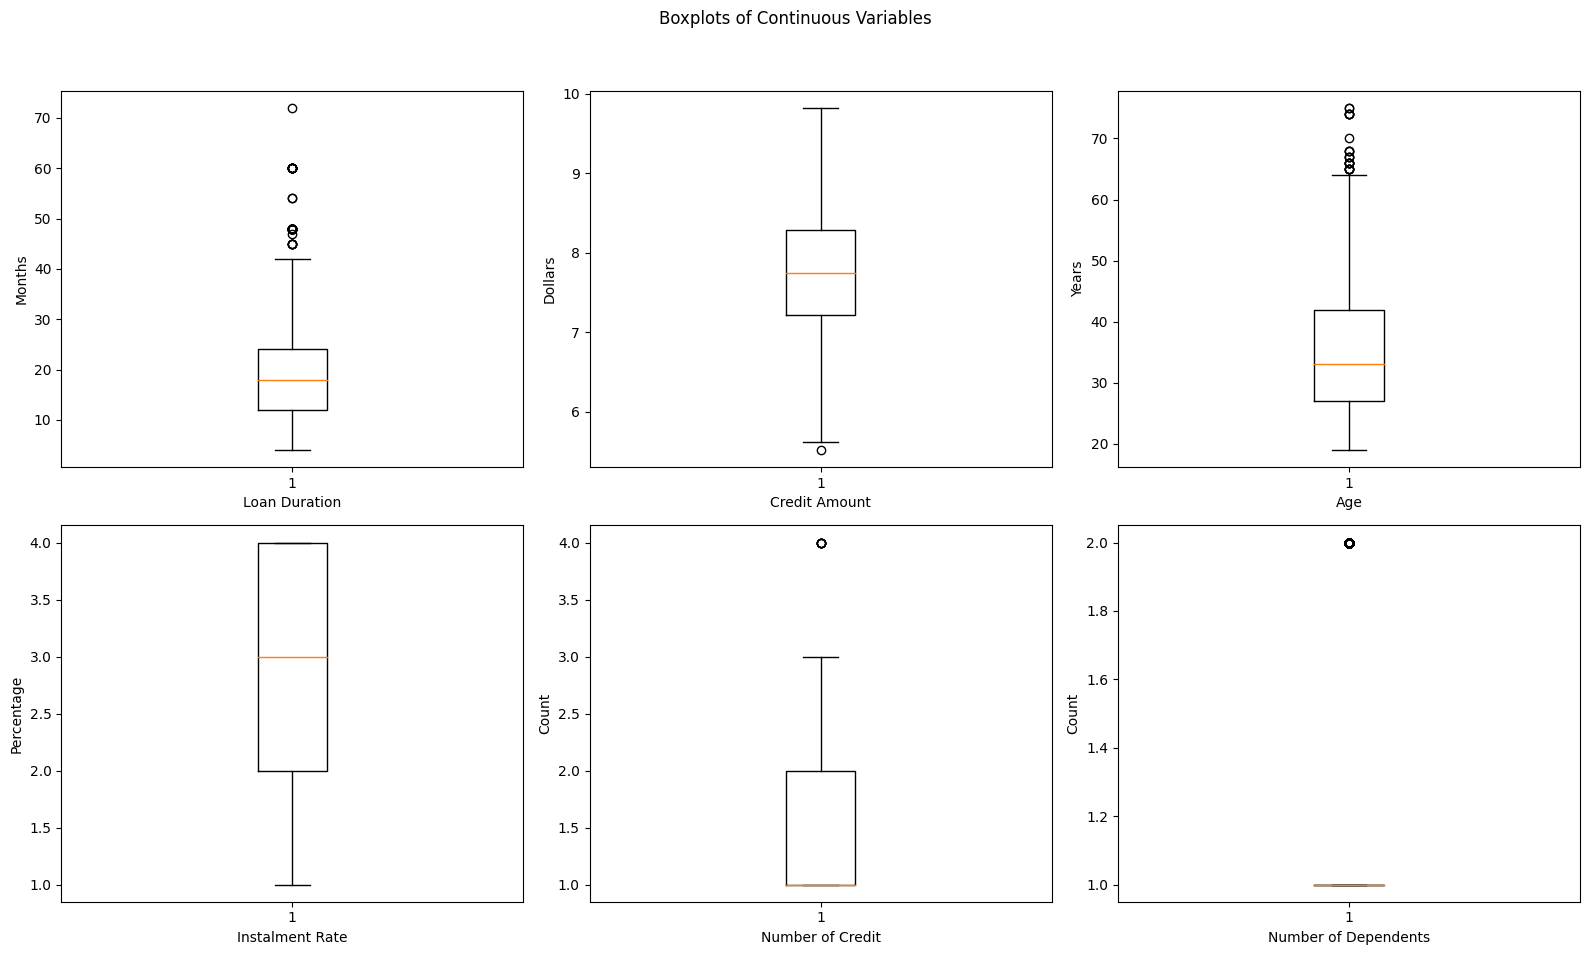

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
plt.suptitle('Boxplots of Continuous Variables')

# Plot boxplot for 'duration'
axes[0, 0].boxplot(df['duration'])
axes[0, 0].set_xlabel('Loan Duration')
axes[0, 0].set_ylabel('Months')

# Plot boxplot for 'credit_amount'
axes[0, 1].boxplot(df['credit_amount'])
axes[0, 1].set_xlabel('Credit Amount')
axes[0, 1].set_ylabel('Dollars')

# Plot boxplot for 'age'
axes[0, 2].boxplot(df['age'])
axes[0, 2].set_xlabel('Age')
axes[0, 2].set_ylabel('Years')

# Plot boxplot for 'installment_rate'
axes[1, 0].boxplot(df['installment_rate'])
axes[1, 0].set_xlabel('Instalment Rate')
axes[1, 0].set_ylabel('Percentage')

# Plot boxplot for 'number_of_existcr'
axes[1, 1].boxplot(df['number_of_existcr'])
axes[1, 1].set_xlabel('Number of Credit')
axes[1, 1].set_ylabel('Count')

# Plot boxplot for 'number_of_dependents'
axes[1, 2].boxplot(df['number_of_dependents'])
axes[1, 2].set_xlabel('Number of Dependents')
axes[1, 2].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplot layout to prevent overlap
plt.show()


In [ ]:
pip install seaborn matplotlib


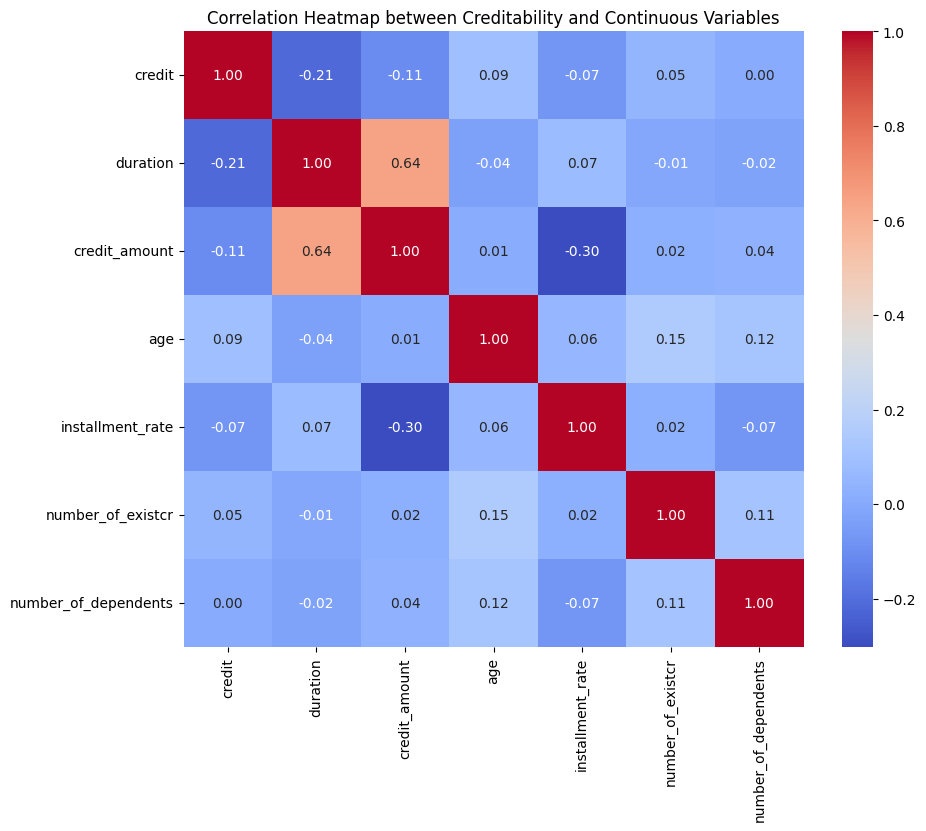

In [ ]:
# Calculate the correlation matrix
corr_matrix = df[['credit', 'duration', 'credit_amount', 'age', 'installment_rate', 'number_of_existcr', 'number_of_dependents']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap between Creditability and Continuous Variables')
plt.show()


In [ ]:
pip install scikit-learn

In [ ]:
# Specify the list of variables you want to remove
variables_to_remove = ['duration', 'credit_amount', 'age', 'installment_rate', 'number_of_existcr', 'number_of_dependents']

# Create ndf by dropping the specified columns from the original DataFrame df
ndf = df.drop(variables_to_remove, axis=1)



In [ ]:
ndf


,credit,account_bal,payment_status,purpose,savings_bond_value,employed_since,sex_marital,guarantor,residence_since,most_valuable_asset,concurrent_credits,type_of_housing,job,telephon,foreign
0,1,1,4,2,1,2,2,1,4,2,3,1,3,1,1
1,1,1,4,0,1,3,3,1,2,1,3,1,3,1,1
2,1,2,2,9,2,4,2,1,4,1,3,1,2,1,1
3,1,1,4,0,1,3,3,1,2,1,3,1,2,1,2
4,1,1,4,0,1,3,3,1,4,2,1,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,2,3,1,3,3,1,4,1,3,1,2,1,1
996,0,1,2,0,1,5,3,2,1,1,3,2,3,1,1
997,0,4,4,0,5,5,3,1,4,4,3,3,4,2,1
998,0,2,2,3,5,1,3,1,1,4,3,2,4,2,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df= scaler.fit_transform(ndf)
scaled_df=pd.DataFrame(scaled_df, columns=ndf.columns)

Text(0.5, 1.0, 'Correlation Heatmap')

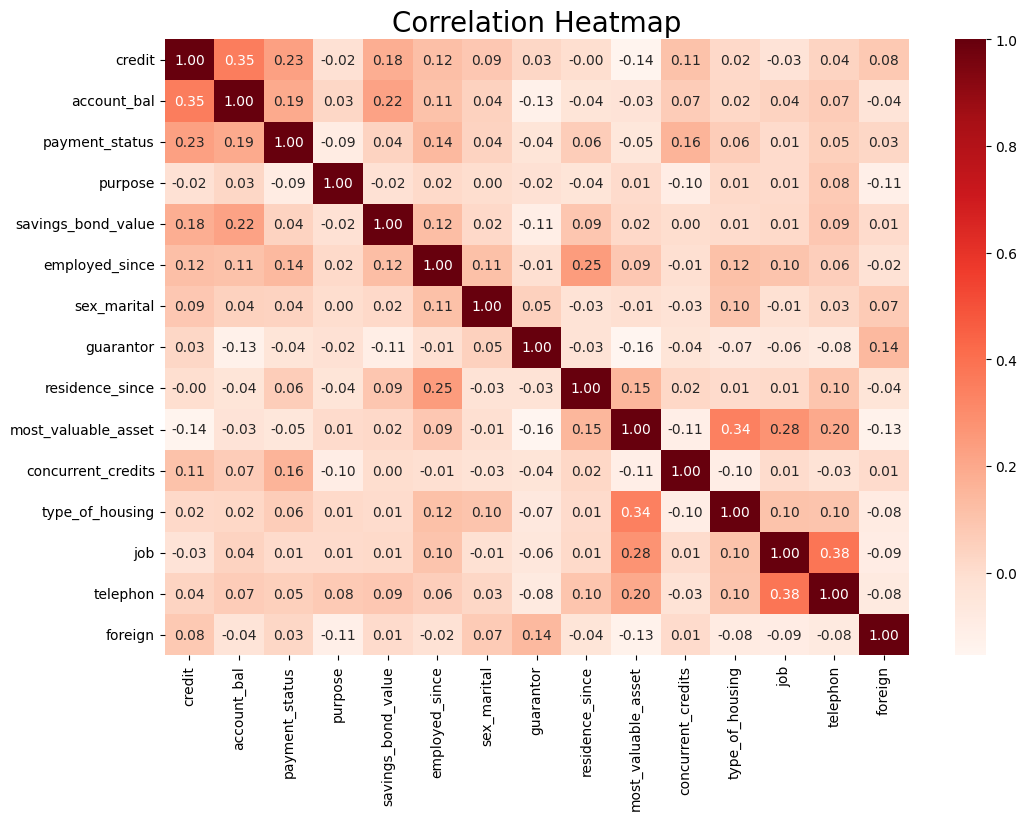

In [ ]:
corr = scaled_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="Reds",fmt='.2f')
plt.title('Correlation Heatmap', fontsize=20)

Text(0, -0.2, 'Note: Positive values indicate a higher correlation with Good Credit, while negative values indicate a higher correlation with Bad Credit.')

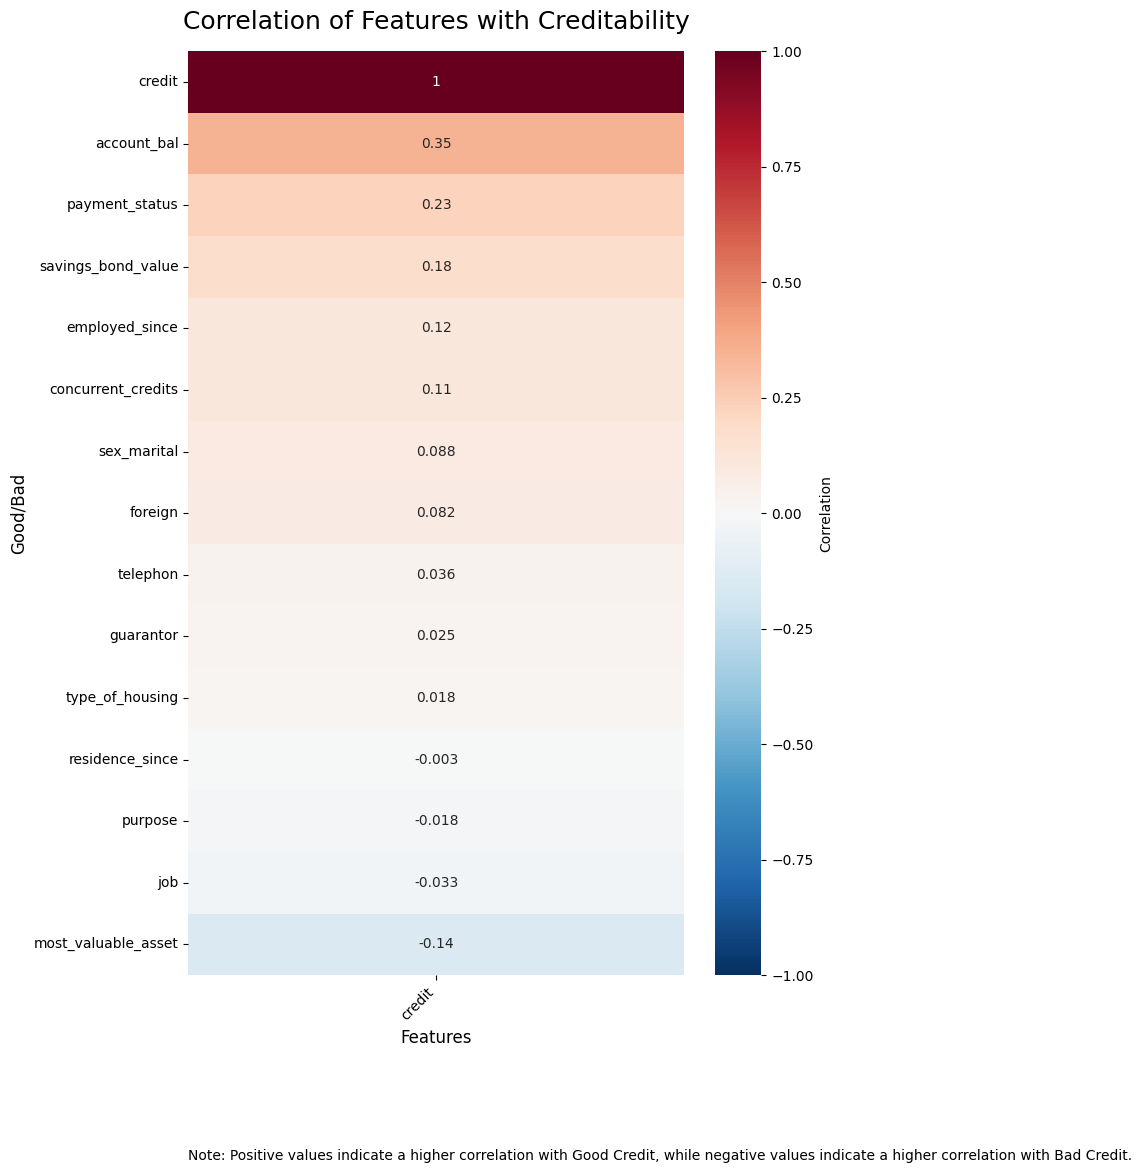

In [ ]:

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(scaled_df.corr()[['credit']].sort_values(by='credit', ascending=False),
vmin=-1, vmax=1, annot=True, cmap='RdBu_r', cbar_kws={'label': 'Correlation'})
heatmap.set_title('Correlation of Features with Creditability', fontdict={'fontsize':18}, pad=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Good/Bad', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.text(0, -0.2, 'Note: Positive values indicate a higher correlation with Good Credit, while negative values indicate a higher correlation with Bad Credit.', transform=plt.gca().transAxes, fontsize=10)